In [8]:
import pandas as pd
df = pd.read_csv('Wholesale.csv')
df.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [9]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [10]:
df = df.drop(['Channel', 'Region'], axis = 1)

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_df = sc.fit_transform(df)
sc_df = pd.DataFrame(sc_df, columns=df.columns)

In [12]:
from sklearn.cluster import KMeans

In [13]:
model = KMeans(n_clusters = 3, random_state = 0)

In [14]:
# モデルに学習させる
model.fit(sc_df)

KMeans(n_clusters=3, random_state=0)

In [17]:
model.labels_

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [18]:
sc_df['cluster'] = model.labels_
sc_df.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0


In [19]:
sc_df.groupby('cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,-0.503804,0.574921,0.823225,-0.332913,0.816078,0.075524
1,0.128126,-0.359900,-0.428714,0.082307,-0.425531,-0.118121
2,1.090044,3.983203,3.584579,0.777993,3.566641,2.256182


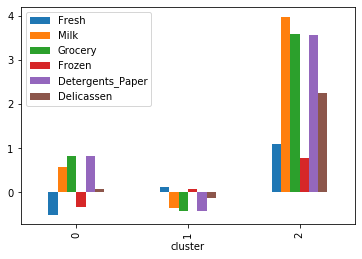

In [20]:
%matplotlib inline
cluster_mean = sc_df.groupby('cluster').mean()
cluster_mean.plot(kind = 'bar')

In [21]:
sse_list = []
# クラスタ数2～30でSSEを調べる
for n in range(2, 31):
    model = KMeans(n_clusters = n, random_state = 0)
    model.fit(sc_df)
    sse = model.inertia_ # SSEの計算
    sse_list.append(sse)
sse_list

[2056.4923628163815,
 1619.952782172456,
 1331.5862623916175,
 1068.6921979401272,
 923.8527021617257,
 847.3101253961319,
 757.7141523453081,
 686.1710067117795,
 629.4282930205019,
 577.3066164826806,
 542.0536936013679,
 500.66052341825485,
 471.59730818086837,
 444.16232027877436,
 420.2819256841493,
 398.2702572152343,
 380.21797525152135,
 362.853478266818,
 336.71380905986763,
 318.453718528161,
 298.20615027072324,
 287.1380172541571,
 278.66303645643933,
 270.5250955739146,
 261.32228501474776,
 250.22088746207055,
 240.34634808250857,
 231.32527278823156,
 224.09122126073785]

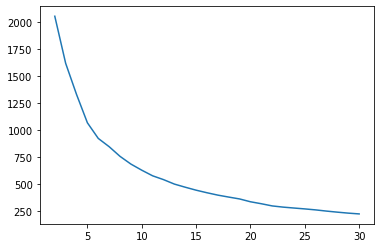

In [22]:
se = pd.Series(sse_list)
num = range(2, 31) # range関数で2～30の整数列を作る
se.index = num # シリーズのインデックスを変更
se.plot(kind = 'line')

In [24]:
model = KMeans(n_clusters = 5, random_state = 0)
model.fit(sc_df)
sc_df['cluster'] = model.labels_
sc_df.to_csv('clustered_Wholesale.csv', index = False)

In [25]:
import pandas as pd
df = pd.read_csv('Survived.csv')

In [26]:
df = df.drop(['PassengerId', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

In [27]:
df = df.fillna(df.mean())

In [28]:
dummy = pd.get_dummies(df['Sex'], drop_first = True)
df = pd.concat([df, dummy], axis = 1)
df = df.drop('Sex', axis = 1)

C:\Users\81806\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.781461506344946 > -36.403505541710459). You may want to try with a higher value of support_fraction (current value: 0.506).
  RuntimeWarning)


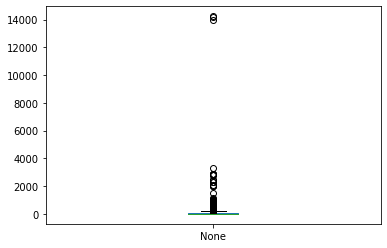

In [29]:
from sklearn.covariance import MinCovDet

mcd = MinCovDet(random_state=0)
mcd.fit(df)

maha_dis = mcd.mahalanobis(df)
tmp = pd.Series(maha_dis)
tmp.plot(kind = 'box')

In [30]:
num = tmp[ tmp > 10000 ].index

df = df.drop(num)

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_df = sc.fit_transform(df)

df2 = pd.DataFrame(sc_df, columns = df.columns)

In [32]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 2, random_state = 0)
model.fit(df2)

df2['cluster'] = model.labels_

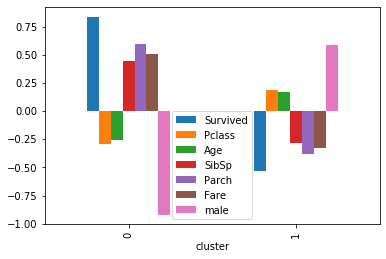

In [33]:
%matplotlib inline

c = df2.groupby('cluster').mean()
c.plot(kind = 'bar')